In [3]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import altair as alt
from IPython.display import display

In [12]:
# loading data
preds = np.load("../results/preds.np")
label = np.load("../results/label.np")

print(preds)
print(label)

[[-1.9481381e-09 -1.0245890e-07 -6.1156220e-07 ... -6.6239068e-09
   2.7129732e-07 -1.4953127e-07]
 [-1.9481381e-09 -1.0245890e-07 -6.1156220e-07 ... -6.6239068e-09
   2.7129732e-07 -1.4953127e-07]
 [-1.9481381e-09 -1.0245890e-07 -6.1156220e-07 ... -6.6239068e-09
   2.7129732e-07 -1.4953127e-07]
 ...
 [-7.8935569e-10  1.0100398e-05 -7.5061206e-07 ...  1.1882863e-06
  -2.1044534e-06 -5.8159308e-08]
 [-7.8935569e-10  1.0100398e-05 -7.5061206e-07 ...  1.1882863e-06
  -2.1044534e-06 -5.8159308e-08]
 [-1.9626802e-09 -3.1023887e-07 -6.1164741e-07 ... -6.7426242e-09
   2.7662628e-07 -1.4958819e-07]]
['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '5' '5' '5' '5' '5' '5' '5' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3'
 '3' '3' '3' '3' '3' '3' '3' '3' '3

In [13]:
# reducting dimensions

def reduce_dim(perplexity):
    preds_reduced = TSNE(n_components=2, perplexity = perplexity).fit_transform(preds)
    return preds_reduced


def create_plot(preds_reduced, label):
    plot_df = pd.DataFrame({'X':preds_reduced[:,0],'Y':preds_reduced[:,1], 'label': label})

    #plot_df["count"] = plot_df.apply(lambda row: len(plot_df[plot_df["label"] == row["label"]]), axis=1)
    #plot_df = plot_df[plot_df["count"] > 45]

    chart = alt.Chart(plot_df).mark_circle(size=60).encode(
        x='X',
        y='Y',
        color='label').interactive()
    
    display(chart)

Perplexity 5


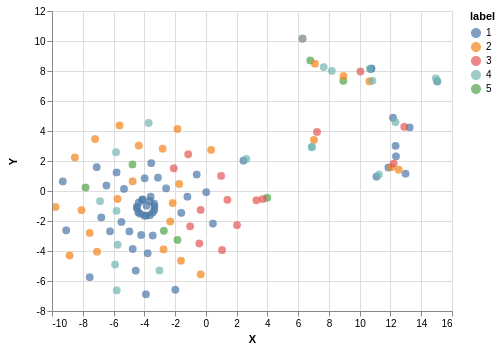

Perplexity 15


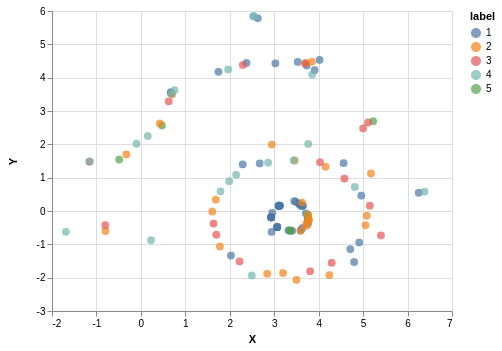

Perplexity 30


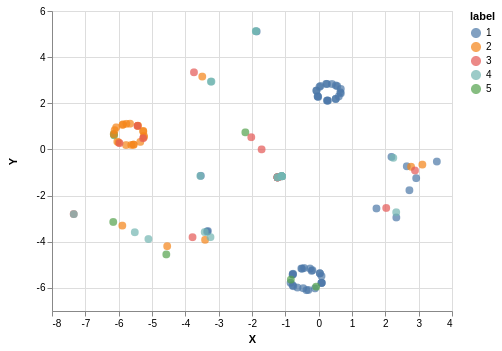

Perplexity 35


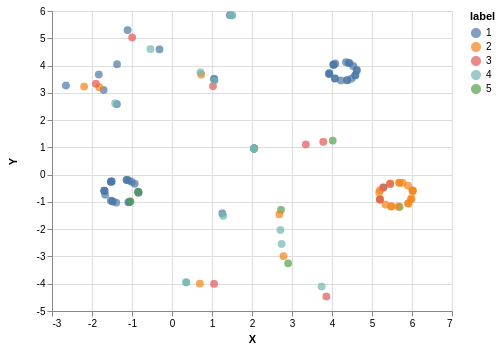

Perplexity 40


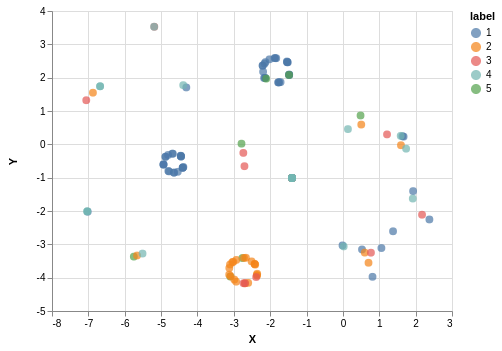

Perplexity 45


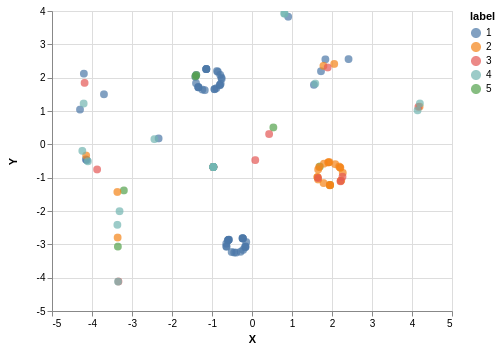

Perplexity 50


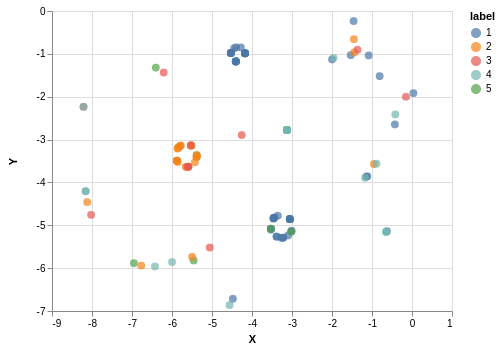

In [15]:
perplexity = [5, 15, 30, 35, 40, 45, 50]

for p in perplexity:
    print("Perplexity {}".format(p))
    r = reduce_dim(p)
    create_plot(r, label)

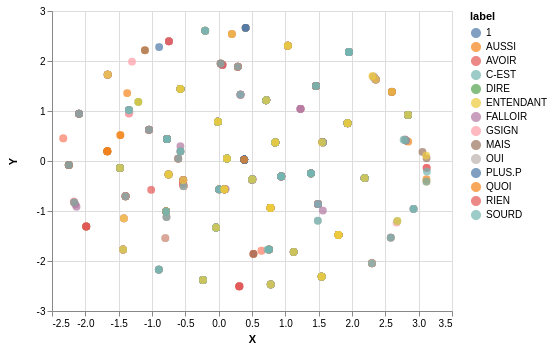

In [5]:
# standalone graph

preds_reduced = TSNE(n_components=2, perplexity = 80).fit_transform(preds)


plot_df = pd.DataFrame({'X':preds_reduced[:,0],'Y':preds_reduced[:,1], 'label': label})

plot_df = plot_df[plot_df["label"] != 'LS']
plot_df["count"] = plot_df.apply(lambda row: len(plot_df[plot_df["label"] == row["label"]]), axis=1)
plot_df = plot_df[plot_df["count"] > 45]

chart = alt.Chart(plot_df).mark_circle(size=60).encode(
    x='X',
    y='Y',
    color='label').interactive()
    
display(chart)